# 설명
* 모델
    * 랜덤포레스트 회귀(기본), 캣부스트 회귀(기본)
* 특성
    * 기온 예측 : ['month', '구분', '시간', 'weekday']
    * 가스공급량 예측 : ['month', '시간', '구분', '기온', 'weekday']
    * PolynomialFeatures(degree=2, include_bias=False)
    * log 적용
* 두 모델의 결과값 평균으로 제출
* 데이콘 점수 : 

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('2013-2018년_가스공급량과_기온2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


In [10]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


### 상관계수 확인

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import platform
from matplotlib import font_manager, rc

In [6]:
# path = "C:/Windows/Fonts/malgun.ttf"
# if platform.system() == "Windows":
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# elif platform.system()=="Darwin":
#     rc('font', family='AppleGothic')
# else:
#     print("Unknown System")

Unknown System


In [8]:
# colab에서 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,738 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

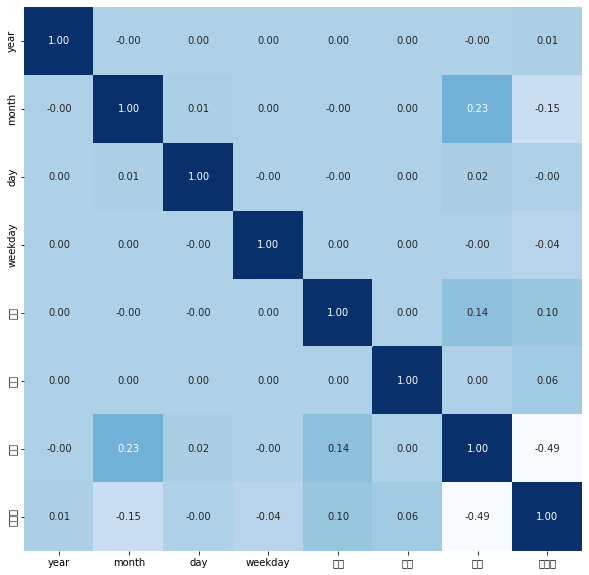

In [13]:
plt.figure(figsize=(10,10))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(df[['year', 'month', 'day', 'weekday', '시간', '구분', '기온', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

<Figure size 864x576 with 0 Axes>

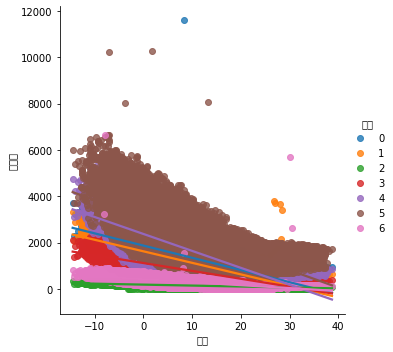

In [14]:
plt.figure(figsize=(12,8))
sns.lmplot(x='기온', y='공급량', hue='구분', data=df)

# [RandomForest]

# 랜덤포레스트회귀 모델 기온 예측(2013-2018년)

### 훈련(2013-2018년)

In [21]:
import numpy as np

In [22]:
# 비선형 변환
df['log_공급량'] = np.log1p(df['공급량'])
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

### 다항 특성

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 9), (92022, 9), (276066,), (92022,))

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [30]:
%%time
rf_r = RandomForestRegressor(n_jobs=-1)
rf_r.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(rf_r, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(rf_r, X_test, y_test, cv=kfold).mean()

CPU times: user 1min 19s, sys: 1.09 s, total: 1min 20s
Wall time: 5min 13s


In [31]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {rf_r.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {rf_r.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.8753464743155177
테스트 셋 결정계수 점수 = 0.8742275498518833
훈련 셋 교차검증 결정계수 = 0.8732265936624997
테스트 셋 교차검증 결정계수 = 0.8717123899558615


## 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [32]:
total = pd.read_csv('test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [33]:
total[['연월일', '시간', '구분']] = total['일자|시간|구분'].str.split(' ').tolist()
total.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,A
1,2019-01-01 02 A,2019-01-01,02,A
2,2019-01-01 03 A,2019-01-01,03,A
3,2019-01-01 04 A,2019-01-01,04,A
4,2019-01-01 05 A,2019-01-01,05,A


In [34]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,0
1,2019-01-01 02 A,2019-01-01,02,0
2,2019-01-01 03 A,2019-01-01,03,0
3,2019-01-01 04 A,2019-01-01,04,0
4,2019-01-01 05 A,2019-01-01,05,0


In [35]:
total['연월일'] = pd.to_datetime(total['연월일'])
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday
total.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1


In [36]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

### 다항특성

In [37]:
# 다항 특성
pol_temp_X = pol.transform(temp_X)
pol_temp_X.shape

(15120, 9)

#### 2019년 기온 예측

In [38]:
temp_pred = rf_r.predict(pol_temp_X)
temp_pred

array([-2.46873252, -2.30865684, -2.36266406, ...,  5.27835134,
        4.37365632,  3.8934724 ])

### 2019년 데이터(total)에 기온값 추가

In [39]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday,기온
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1,-2.468733
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1,-2.308657
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1,-2.362664
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1,-2.577623
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1,-2.778925


# 랜덤포레스트회귀 모델 가스공급량 훈련(2013-2018)

### 기온 포함해서 훈련(2013-2018)

In [41]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['log_공급량']
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


### 다항특성

In [42]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 14), (92022, 14), (276066,), (92022,))

In [44]:
%%time
rf_r = RandomForestRegressor(n_jobs=-1)
rf_r.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(rf_r, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(rf_r, X_test, y_test, cv=kfold).mean()

CPU times: user 5min 24s, sys: 9.81 s, total: 5min 34s
Wall time: 17min 54s


In [45]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {rf_r.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {rf_r.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9641339479298553
테스트 셋 결정계수 점수 = 0.8972858484483391
훈련 셋 교차검증 결정계수 = 0.9011294898392874
테스트 셋 교차검증 결정계수 = 0.8987901079800883


# 랜덤포레스트회귀 가스 공급량 예측(2019년)

### 기온 포함해서 예측(2019년)

In [46]:
# 2019년 가스공급량 예측(RF)
col = ['month', '시간', '구분', '기온']
final_X = total[col]

# 다항 특성
pol_final_X = pol.transform(final_X)

In [47]:
gas_pred = np.expm1(rf_r.predict(pol_final_X))

In [48]:
# 데이터 셋으로 만들기
pred_rf = pd.DataFrame({'공급량':gas_pred})
pred_rf.describe()

,공급량
count,15120.000000
mean,1532.182122
std,1055.851749
min,99.433801
25%,498.436226
50%,1442.606692
75%,2297.865870
max,4380.220719


In [49]:
pred_rf.loc[pred_rf['공급량']< 0, '공급량'] = 0
pred_rf.describe()

,공급량
count,15120.000000
mean,1532.182122
std,1055.851749
min,99.433801
25%,498.436226
50%,1442.606692
75%,2297.865870
max,4380.220719


# [CatBoost]

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [50]:
df = pd.read_csv('2013-2018년_가스공급량과_기온2.csv')
# 비선형 변환
df['log_공급량'] = np.log1p(df['공급량'])
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


## catboost회귀 모델 기온 예측(2013-2018년)

### 훈련(2013-2018년)

In [51]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

In [52]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 9), (92022, 9), (276066,), (92022,))

In [54]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 27 kB/s 


In [55]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [56]:
%%time
cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 6.9336005	total: 76ms	remaining: 10.8s
7:	learn: 6.5837412	total: 86.5ms	remaining: 10.7s
8:	learn: 6.2866163	total: 97.2ms	remaining: 10.7s
9:	learn: 6.0167280	total: 108ms	remaining: 10.7s
10:	learn: 5.7639592	total: 118ms	remaining: 10.6s
11:	learn: 5.5566033	total: 128ms	remaining: 10.6s
12:	learn: 5.3510074	total: 138ms	remaining: 10.5s
13:	learn: 5.1626344	total: 149ms	remaining: 10.5s
14:	learn: 5.0003385	total: 159ms	remaining: 10.4s
15:	learn: 4.8538383	total: 170ms	remaining: 10.4s
16:	learn: 4.7234002	total: 180ms	remaining: 10.4s
17:	learn: 4.6091489	total: 191ms	remaining: 10.4s
18:	learn: 4.5044226	total: 209ms	remaining: 10.8s
19:	learn: 4.4142756	total: 220ms	remaining: 10.8s
20:	learn: 4.3309499	total: 230ms	remaining: 10.7s
21:	learn: 4.2555673	total: 241ms	remaining: 10.7s
22:	learn: 4.1848734	total: 252ms	remaining: 10.7s
23:	learn: 4.1262429	total: 262ms	remaining: 10.7s
24:	learn: 4.0747153	total: 273ms	remaining: 10.6

In [57]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.8753029607563801
테스트 셋 결정계수 점수 = 0.8749026584707443
훈련 셋 교차검증 결정계수 = 0.8739948750305032
테스트 셋 교차검증 결정계수 = 0.873850147645534


# 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [58]:
total = pd.read_csv('test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [59]:
total[['연월일', '시간', '구분']] = total['일자|시간|구분'].str.split(' ').tolist()
total.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,A
1,2019-01-01 02 A,2019-01-01,02,A
2,2019-01-01 03 A,2019-01-01,03,A
3,2019-01-01 04 A,2019-01-01,04,A
4,2019-01-01 05 A,2019-01-01,05,A


In [60]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,0
1,2019-01-01 02 A,2019-01-01,02,0
2,2019-01-01 03 A,2019-01-01,03,0
3,2019-01-01 04 A,2019-01-01,04,0
4,2019-01-01 05 A,2019-01-01,05,0


In [61]:
total['연월일'] = pd.to_datetime(total['연월일'])
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday
total.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1


In [62]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

#### 2019년 기온 예측

In [63]:
# 다항 특성
pol_temp_X = pol.transform(temp_X)
pol_temp_X.shape

(15120, 9)

In [64]:
temp_pred = cb.predict(pol_temp_X)
temp_pred

array([-2.4292753 , -2.32541336, -2.33484656, ...,  5.33795838,
        4.33721617,  3.85645493])

### 2019년 데이터(total)에 기온값 추가

In [65]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday,기온
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1,-2.429275
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1,-2.325413
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1,-2.334847
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1,-2.562155
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1,-2.816924


# catboost회귀 모델 가스공급량 훈련(2013-2018)

### 기온 포함해서 훈련(2013-2018)

In [66]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['log_공급량']
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


In [67]:
# 다항 특성
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)
# 훈련, 검증 셋 분할
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 14), (92022, 14), (276066,), (92022,))

In [68]:
%%time
cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.7842374	total: 93.4ms	remaining: 13.2s
7:	learn: 0.7442052	total: 106ms	remaining: 13.2s
8:	learn: 0.7096495	total: 120ms	remaining: 13.2s
9:	learn: 0.6771515	total: 134ms	remaining: 13.2s
10:	learn: 0.6477925	total: 146ms	remaining: 13.2s
11:	learn: 0.6247565	total: 159ms	remaining: 13.1s
12:	learn: 0.6020140	total: 179ms	remaining: 13.6s
13:	learn: 0.5807417	total: 206ms	remaining: 14.5s
14:	learn: 0.5609640	total: 221ms	remaining: 14.5s
15:	learn: 0.5441201	total: 234ms	remaining: 14.4s
16:	learn: 0.5300464	total: 250ms	remaining: 14.4s
17:	learn: 0.5150391	total: 263ms	remaining: 14.4s
18:	learn: 0.5024817	total: 276ms	remaining: 14.2s
19:	learn: 0.4915775	total: 288ms	remaining: 14.1s
20:	learn: 0.4804353	total: 302ms	remaining: 14.1s
21:	learn: 0.4720496	total: 314ms	remaining: 13.9s
22:	learn: 0.4654519	total: 326ms	remaining: 13.8s
23:	learn: 0.4569897	total: 338ms	remaining: 13.8s
24:	learn: 0.4493174	total: 351ms	remaining: 13.7

In [69]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9286669525110413
테스트 셋 결정계수 점수 = 0.9223979732258827
훈련 셋 교차검증 결정계수 = 0.9243481161087953
테스트 셋 교차검증 결정계수 = 0.9197715997233262


## catboost회귀 모델로 가스 공급량 예측(2019년 예측 기온 데이터 포함)

### 기온 포함해서 예측(2019년)

In [70]:
# 2019년 가스공급량 예측(catboost)
col = ['month', '시간', '구분', '기온']
final_X = total[col]
# 다항 특성
pol_final_X = pol.transform(final_X)
pol_final_X.shape                              

(15120, 14)

In [71]:
gas_pred = np.expm1(cb.predict(pol_final_X))

In [72]:
# 데이터 셋으로 만들기
pred_cb = pd.DataFrame({'공급량':gas_pred})
pred_cb.describe()

,공급량
count,15120.000000
mean,1525.136294
std,1038.696999
min,122.798869
25%,512.251357
50%,1471.494466
75%,2256.196034
max,4152.705986


In [73]:
pred_cb.loc[pred_cb['공급량']< 0, '공급량'] = 0
pred_cb.describe()

,공급량
count,15120.000000
mean,1525.136294
std,1038.696999
min,122.798869
25%,512.251357
50%,1471.494466
75%,2256.196034
max,4152.705986


## 모델의 예측값 평균내기

In [74]:
pred = (pred_rf + pred_cb) / 2
pred.head()

,공급량
0,1887.403588
1,1685.730805
2,1626.373689
3,1717.280393
4,1808.630487


# 제출 파일 만들기

In [75]:
# 제출 파일 불러오기
sub = pd.read_csv('sample_submission.csv')
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [76]:
sub['공급량'] = pred['공급량']
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1887.403588
1,2019-01-01 02 A,1685.730805
2,2019-01-01 03 A,1626.373689
3,2019-01-01 04 A,1717.280393
4,2019-01-01 05 A,1808.630487


In [77]:
# 가스 공급량 예측 결정계수 점수
# 랜덤포레스트 : 0.8987
# catbooost : 0.9197
sub.to_csv("sub08_rf_cat_05.csv", index=False)

In [ ]:
# 'month', '시간', '구분', '기온', 다항, log변환, rf기본 ,catboost 기본, 예측 평균
# 데이콘 팀 일일 제출 한도 3개
# 데이콘 점수 : 